# Image Classification with CNN for the SVHN dataset
### Introduction

This notebook presents the implementation of a convolutional neural network (CNN) for classifying digit images from the Street View House Numbers (SVHN) dataset.  
Unlike standard benchmarks such as MNIST, SVHN contains digits embedded in real-world scenes, making the classification task more challenging due to variations in background, lighting, and noise.

The goal of this project is to build and evaluate a complete image classification pipeline, including data loading, preprocessing, model training, and performance evaluation.

The notebook begins with dataset loading and inspection, followed by preprocessing and exploratory visualization.  
Subsequent sections focus on the design and training of the neural network model and the analysis of its performance.


In [ ]:
import tensorflow as tf
from scipy.io import loadmat

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = loadmat('/content/gdrive/My Drive/train_32x32.mat')
test = loadmat('/content/gdrive/My Drive/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

### Dataset Inspection and Preprocessing

**Note:**  
This step focuses on preparing the dataset for convolutional neural network training.  
The training and test sets are handled separately to avoid data leakage.

A random subset of training images is visualized as an exploratory step to assess data quality, image structure, and variability across samples.

The images are then converted to grayscale by averaging the RGB channels, reducing input dimensionality while preserving the essential spatial information required for classification.

Finally, a subset of grayscale images is visualized to verify that the preprocessing step has been applied correctly.



In [ ]:
x_train=train['X']
y_train=train['y']
x_test=test['X']
y_test=test['y']

In [ ]:
x_train.shape

(32, 32, 3, 73257)

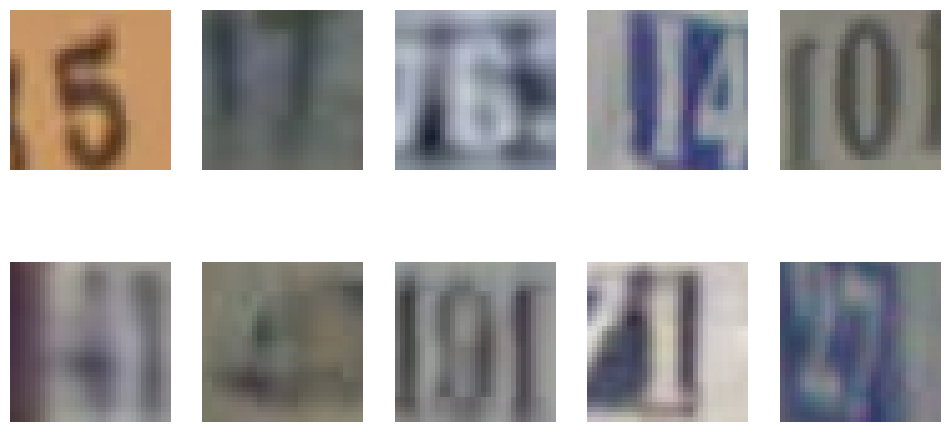

In [ ]:
import matplotlib.pyplot as plt
import random
images=[]
for i in range(10):
    random_i=random.sample(range(73257),k=1)[0]
    image_i= x_train [:,:,:,random_i]
    images.append(image_i)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.axis('off')
plt.show()


In [ ]:
import numpy as np
x_train_gray = np.mean(x_train, axis=2,keepdims= True)
x_test_gray=np.mean(x_test, axis=2,keepdims= True)

In [ ]:
x_train_gray.shape

(32, 32, 1, 73257)

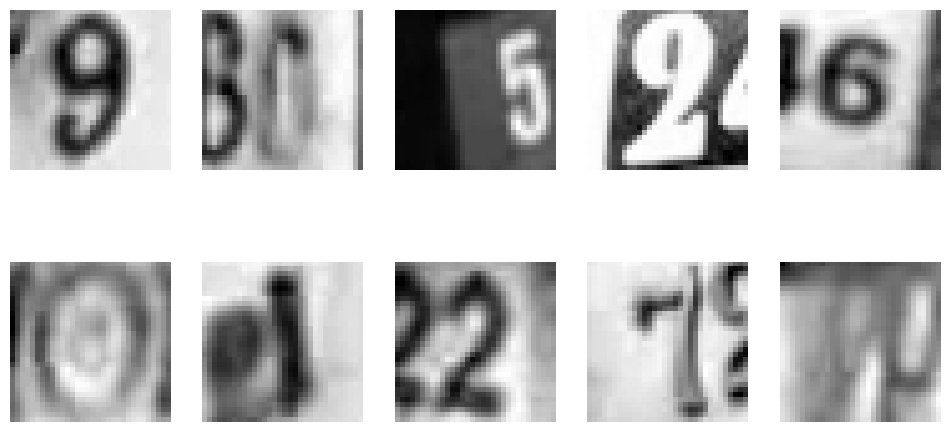

In [ ]:
images_gray=[]
for i in range(10):
    random_gray_i=random.sample(range(73257),k=1)[0]
    image_gray_i= x_train_gray [:,:,:,random_gray_i]
    images_gray.append(image_gray_i)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images_gray[i],cmap='gray')
    ax.axis('off')
plt.show()


## 2. MLP Neural Network Classifier

In this section, a multilayer perceptron (MLP) model is implemented using the Keras Sequential API.

The input images are normalized to the range [0, 1] and reshaped appropriately.  
Labels are preprocessed by mapping the value 10 to 0 and converting them into one-hot encoded vectors.

The model consists of a Flatten layer followed by fully connected layers with ReLU activation, and a final softmax layer for 10-class classification.

The model is compiled using the Adam optimizer and categorical cross-entropy loss, and trained with a 20% validation split.  
EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint callbacks are used to improve training stability and save the best model.

Training and validation performance are monitored through loss and accuracy curves, and the final model is evaluated on the test set.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.regularizers import L1L2,L2
from tensorflow.keras.initializers import he_uniform

In [ ]:
x_train_normalized= np.transpose(x_train,(3,0,1,2))/255
x_test_normalized= np.transpose(x_test,(3,0,1,2))/255

In [ ]:
x_train_normalized.shape

(73257, 32, 32, 3)

In [ ]:
y_train[y_train == 10] =0
y_test[y_test==10]=0

In [ ]:
y_train_categorical = tf.keras.utils.to_categorical(np.array(y_train))
y_test_categorical = tf.keras.utils.to_categorical(np.array(y_test))

In [ ]:
y_train_categorical.shape

(73257, 10)

In [ ]:
mlp_model= Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 opt_mlp= tf.keras.optimizers.Adam(learning_rate=0.001)
 mlp_model.compile(optimizer=opt_mlp, loss='categorical_crossentropy',metrics=['Accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
callback_1_mlp= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.005,patience=3,verbose=0, mode='min')

In [ ]:
callback_2_mlp= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',Factor=0.1, min_lr=0.0001, min_delta=0.01,patience=3,verbose=0, mode='min')

In [ ]:
checkpoint_path_mlp='mlp_model/ModelCheckpoint.keras'
callback_3_mlp=tf.keras.callbacks.ModelCheckpoint(checkpoint_path_mlp, save_weights_only=False,save_best_only=True,  monitor='val_loss',verbose=0,save_freq='epoch')

In [ ]:
history_mlp=mlp_model.fit(x_train_normalized, y_train_categorical, batch_size=1000, epochs=100,callbacks=[callback_1_mlp,callback_2_mlp,callback_3_mlp], validation_split=0.2,verbose=1)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 222ms/step - Accuracy: 0.1663 - loss: 2.3987 - val_Accuracy: 0.1874 - val_loss: 2.2427 - learning_rate: 0.0010
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - Accuracy: 0.1931 - loss: 2.2403 - val_Accuracy: 0.1985 - val_loss: 2.2266 - learning_rate: 0.0010
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - Accuracy: 0.1989 - loss: 2.2266 - val_Accuracy: 0.2270 - val_loss: 2.1942 - learning_rate: 0.0010
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - Accuracy: 0.2339 - loss: 2.1507 - val_Accuracy: 0.2544 - val_loss: 2.1334 - learning_rate: 0.0010
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - Accuracy: 0.2992 - loss: 1.9967 - val_Accuracy: 0.3826 - val_loss: 1.7518 - learning_rate: 0.0010
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - Accuracy: 0.4274 - loss: 1.6609 - val_Accuracy: 0.5156 - val_loss: 1.4957 - learning_rate: 0.0010
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - Accuracy: 0.5263 - l

In [ ]:
! ls -lh mlp_model

total 20M
-rw-r--r-- 1 root root 20M Aug  1 21:30 ModelCheckpoint.keras


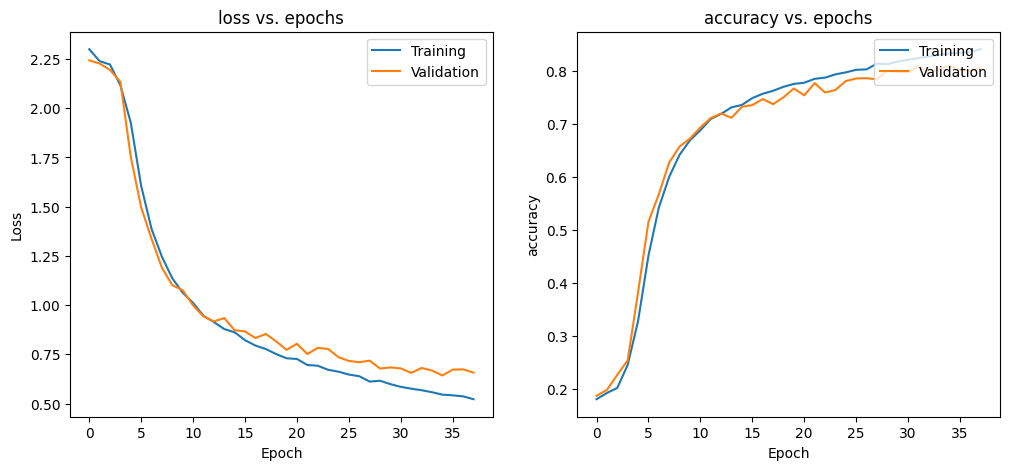

In [ ]:
fig_mlp = plt.figure(figsize=(12, 5))

fig_mlp.add_subplot(121)

plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig_mlp.add_subplot(122)

plt.plot(history_mlp.history['Accuracy'])
plt.plot(history_mlp.history['val_Accuracy'])
plt.title('accuracy vs. epochs')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

In [ ]:
test_loss, test_Accuracy= mlp_model.evaluate(x_test_normalized, y_test_categorical)

814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - Accuracy: 0.7812 - loss: 0.7869


## 3. CNN Neural Network Classifier

In this section, a convolutional neural network (CNN) is implemented using the Keras Sequential API.

The model consists of two convolutional blocks, each including a Conv2D layer followed by MaxPooling, Dropout, and BatchNormalization.  
These layers enable the model to capture spatial features while improving generalization and training stability.

The convolutional layers are followed by a Flatten layer and a fully connected Dense layer, with a final softmax layer for 10-class classification.

The model is compiled using the Adam optimizer and categorical cross-entropy loss, and trained with a 20% validation split.  
EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint callbacks are used to control overfitting, adjust learning rate, and save the best model.

Training and validation performance are monitored through loss and accuracy curves, and the final model is evaluated on the test set.


In [ ]:
CNN_model = Sequential([
    Conv2D(16, (3, 3), input_shape=(32, 32, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0001)),
    MaxPool2D((2, 2)),
    Dropout(0.3),
    BatchNormalization(),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.3),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,450 (1.16 MB)

 Trainable params: 303,386 (1.16 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
opt_CNN= tf.keras.optimizers.Adam(learning_rate=0.001)
CNN_model.compile(optimizer=opt_CNN, loss='categorical_crossentropy',metrics=['Accuracy'])

In [ ]:
callback_1_CNN= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.005,patience=3,verbose=0, mode='min')

In [ ]:
callback_2_CNN= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',Factor=0.1, min_lr=0.0001, min_delta=0.01,patience=3,verbose=0, mode='min')

In [ ]:
checkpoint_path_CNN='CNN_model/ModelCheckpoint.keras'
callback_3_CNN=tf.keras.callbacks.ModelCheckpoint(checkpoint_path_CNN, save_weights_only=False,save_best_only=True,  monitor='val_loss',verbose=1,save_freq='epoch')

In [ ]:
history_CNN=CNN_model.fit(x_train_normalized, y_train_categorical, batch_size=500, epochs=30,callbacks=[callback_1_CNN,callback_2_CNN,callback_3_CNN], validation_split=0.2,verbose=1)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - Accuracy: 0.2142 - loss: 2.4656
Epoch 1: val_loss improved from inf to 2.02310, saving model to CNN_model/ModelCheckpoint.keras
118/118 ━━━━━━━━━━━━━━━━━━━━ 53s 427ms/step - Accuracy: 0.2153 - loss: 2.4617 - val_Accuracy: 0.4025 - val_loss: 2.0231 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - Accuracy: 0.6150 - loss: 1.1897
Epoch 2: val_loss improved from 2.02310 to 1.81654, saving model to CNN_model/ModelCheckpoint.keras
118/118 ━━━━━━━━━━━━━━━━━━━━ 78s 398ms/step - Accuracy: 0.6152 - loss: 1.1891 - val_Accuracy: 0.4337 - val_loss: 1.8165 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - Accuracy: 0.6919 - loss: 0.9527
Epoch 3: val_loss improved from 1.81654 to 1.63281, saving model to CNN_model/ModelCheckpoint.keras
118/118 ━━━━━━━━━━━━━━━━━━━━ 79s 374ms/step - Accuracy: 0.6920 - loss: 0.9524 - val_Accuracy: 0.4055 - val_loss: 1.6328 - learning_rate: 0.0010
Epoch 4/

In [ ]:
! ls -lh CNN_model

total 3.6M
-rw-r--r-- 1 root root 3.6M Aug  1 21:53 ModelCheckpoint.keras


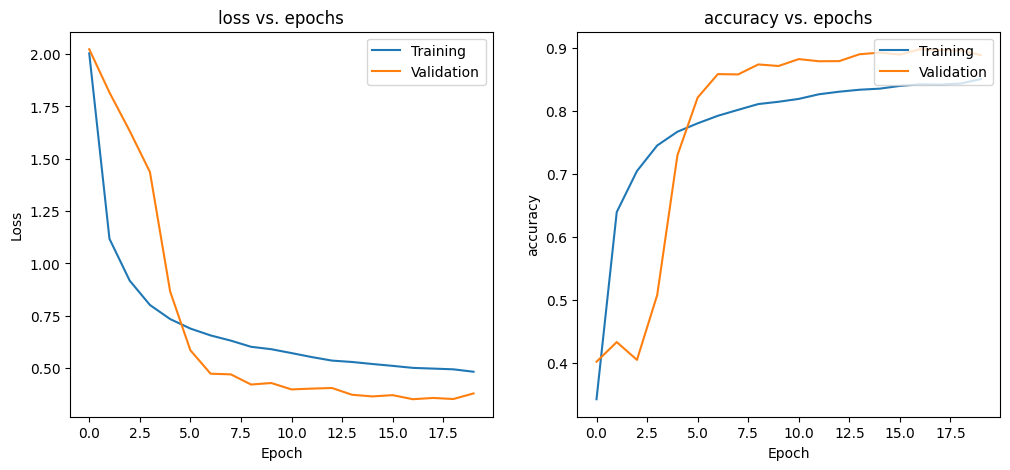

In [ ]:
fig_CNN= plt.figure(figsize=(12, 5))

fig_CNN.add_subplot(121)

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig_CNN.add_subplot(122)

plt.plot(history_CNN.history['Accuracy'])
plt.plot(history_CNN.history['val_Accuracy'])
plt.title('accuracy vs. epochs')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

In [ ]:
test_loss, test_Accuracy= CNN_model.evaluate(x_test_normalized, y_test_categorical)

814/814 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - Accuracy: 0.8759 - loss: 0.4083


## 4. Model Predictions

In this section, the best-performing weights for both the MLP and CNN models are loaded from the saved checkpoints.

A random subset of test images is selected and used to generate predictions from both models.  
Each image is displayed alongside its true label, and the predicted class from each model is reported.

This step provides a qualitative comparison of the two models by examining their predictions on unseen data.


In [ ]:
mlp_model.load_weights('mlp_model/ModelCheckpoint.keras')

In [ ]:
CNN_model.load_weights('CNN_model/ModelCheckpoint.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image 1: true label is [5], Prediction of MLP model is 3, and Prediction of CNN model is 5
Image 2: true label is [5], Prediction of MLP model is 5, and Prediction of CNN model is 5
Image 3: true label is [1], Prediction of MLP model is 4, and Prediction of CNN model is 1
Image 4: true label is [5], Prediction of MLP model is 5, and Prediction of CNN model is 5
Image 5: true label is [8], Prediction of MLP model is 4, and Prediction of CNN model is 3


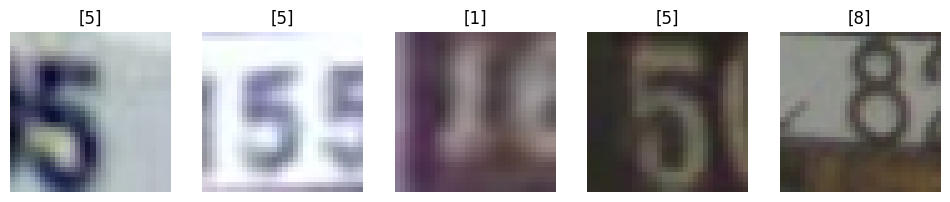

In [ ]:
test_images=[]
test_labels=[]
mlp_predict=[]
CNN_predict=[]
for i in range(5):
    random_test_i=random.sample(range(26032),k=1)[0]
    test_image_i= x_test[:,:,:,random_test_i]
    test_label_i=y_test[random_test_i]
    mlp_predict_i=mlp_model.predict(test_image_i[np.newaxis,...])
    CNN_predict_i=CNN_model.predict(test_image_i[np.newaxis,...])
    test_images.append(test_image_i)
    test_labels.append(test_label_i)
    mlp_predict.append(mlp_predict_i)
    CNN_predict.append(CNN_predict_i)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(test_images[i])
    ax.set_title(test_labels[i])
    print(f"Image {i+1}: true label is {test_labels[i]}, Prediction of MLP model is {np.argmax(mlp_predict[i])}, and Prediction of CNN model is {np.argmax(CNN_predict[i])}")
    ax.axis('off')
plt.show()


In [ ]:
! rm -r mlp_model

In [ ]:
! rm -r CNN_model